# Data wrangling 
data wrangling is a part of data analysis which takes about 80% of it or more , to wrangle a data you should pass by 3 steps which are gathering data 
assesings data
cleaning data
here we will pass by all of this process to wrangle WeRateDogs twitter page .

# # import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
from bs4 import BeautifulSoup
import os
from PIL import Image
from io import BytesIO
import glob
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import string

# Gather 

In [11]:
# use pandas to read csv as pandas data frame
df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [12]:
# access twitter api
consumer_key = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
consumer_secret = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
access_token = '303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
access_secret = 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
# create tweets errors list
error = []

# create List of tweets
tweets = []

# add each available tweet json to df_list with a For loop 
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # count favorites
        retweets = tweet['retweet_count'] # count retweets
        
        tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    except Exception as e:
        error.append(tweet_id)

In [18]:
#create dataframe
df2=pd.DataFrame(tweets, columns = ['tweet_id', 'favorites', 'retweets'])
#change dataframe to csv 
df2.to_csv('tweet-json.txt', encoding = 'utf-8', index=False)


In [19]:
# read csv as pandas dataframe
df2 =pd.read_csv('tweet-json.txt', encoding = 'utf-8')
df2.head()

,tweet_id,favorites,retweets
0,892420643555336193,35728,7551
1,892177421306343426,30873,5599
2,891815181378084864,23215,3708
3,891689557279858688,39023,7736
4,891327558926688256,37279,8335


In [20]:
#read tsv file as pandas dataframe
df3=pd.read_csv('image-predictions.tsv',sep='\t')

In [21]:
df3.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Asses

In [22]:
#manually explore df
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [23]:
# automatically explore df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
#check if there is duplicate tweet_ids
df['tweet_id'].duplicated().any()

False

In [25]:
#explore rating numerators less than 10
df.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [26]:
#explore rating denominators less than 10
df.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [27]:
#explore rating denominators more than 10
df.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [28]:
#cheack if there is duplicated text
sum(df.text.duplicated())

0

In [29]:
# find duplicated name
df['name'][df['name'].duplicated().iloc[:]==True]

7         None
12        None
23      Canela
24        None
25        None
         ...  
2351      None
2352         a
2353         a
2354         a
2355      None
Name: name, Length: 1399, dtype: object

In [30]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [32]:
df2

,tweet_id,favorites,retweets
0,892420643555336193,35728,7551
1,892177421306343426,30873,5599
2,891815181378084864,23215,3708
3,891689557279858688,39023,7736
4,891327558926688256,37279,8335
...,...,...,...
2323,666049248165822465,96,40
2324,666044226329800704,265,127
2325,666033412701032449,111,40
2326,666029285002620928,120,42


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2328 non-null   int64
 1   favorites  2328 non-null   int64
 2   retweets   2328 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [34]:
df2.describe()

,tweet_id,favorites,retweets
count,2.328000e+03,2328.000000,2328.000000
mean,7.419411e+17,7469.855241,2657.973797
std,6.826928e+16,11594.163258,4493.436374
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1299.750000,539.000000
50%,7.183508e+17,3243.500000,1243.000000
75%,7.986755e+17,9151.000000,3087.750000
max,8.924206e+17,154031.000000,76315.000000


In [35]:
df3

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [37]:
df3.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# clean

# Quality 
timestamp should be datetime instead of object (string).

wrong values in The numerator and denominator columns.

Misssing and incorrect names .

Missing data in stages column.

Source not extracted properly from hyperlink tag.

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and retweeted_status_timestamp, have a lot of null values.

tweet id has incorrect Data types.

create a rating column.

store new data.

# Tidiness
Gender of the dog could be extracted from text.

The dog stage columns in df can be arranged into a single column.

Hashtags could be extracted from text.

The image predictions could be condensed to show just the most confident dog breed prediction , image url and tweet id.

df should be joined to df2 and df3

In [38]:
#create copy to maintain original data
df_clean=df.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

In [39]:
#extract rating numerator from the text 
#create list to append the output numerator in it
list_=[]
for text in df_clean['text']:
    numerator = re.sub('[a-zA-Z]','',text.split('http',1)[0].split('/',2)[-2][-5:].replace('. ','').replace(' .','').replace(' ','').replace('. ','').replace('!','').replace('@','').replace('*','').replace('(','').replace(')','').replace('?','').replace('^','').replace('%','').replace('$','').replace('&','').replace('#','').replace('"','').replace('/n/n','').replace('/n','').replace('..','').replace('...','').replace(',','').replace(':','').replace(';','').replace('0\n','').replace('5/15','nan').replace('🇺🇸','').replace('-',''))
    try :
        if numerator[0] is not'1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9':
            numerator= re.sub('[a-zA-Z]','',numerator.replace(' .','')).replace('. ','').replace(' .','').replace(' ','').replace("'","").replace('!','').replace('@','').replace('*','').replace('(','').replace(')','').replace('?','').replace('^','').replace('%','').replace('$','').replace('&','').replace('#','').replace(' .','').replace('  .','').replace('..','').replace('...','').replace('"','').replace('/n/n','').replace(',','').replace(':','').replace(';','').replace('5/15','nan').replace('0\n','').replace('-','')
    except:
        try :
            numerator = float(re.sub('[a-zA-Z]','',text.split('/10',2)[0][-5:].replace('. ','').replace(' ','').replace('!','').replace('@','').replace('*','').replace('(','').replace(')','').replace('?','').replace('^','').replace('%','').replace('$','').replace('&','').replace('#','').replace('"','').replace('/n/n','').replace('/n','').replace('..','').replace('...','').replace(',','').replace(':','').replace(';','').replace('0\n','').replace('5/15','nan').replace('🇺🇸','').replace('-','')))
        except :
            numerator =df.rating_numerator[df_clean.index[df_clean['text']==text][0]]                                                         
    try:
        list_.append(float(numerator))
    except :
        numerator= text.split('http',1)[0].split('/',2)[-2][-5:][3:]
        list_.append(float(numerator))

In [40]:
# fix the rating numerator in the dataframe by assigning it to the new numerator
df_clean['rating_numerator']=list_

In [41]:
#examine out put 
df_clean['rating_numerator'][1846]

10.0

In [42]:
df_clean['rating_numerator'][45]

13.5

In [43]:
#make sure to change the type of numerator to float
df_clean['rating_numerator'].astype(float)

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2356, dtype: float64

In [44]:
df_clean['rating_denominator'][313]

0

In [45]:
df_clean['rating_numerator'][2333]

9.0

In [46]:
df_clean['rating_denominator'][313]

0

In [47]:
df_clean['text'][1274]

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [48]:
df_clean['rating_numerator'].describe()

count    2356.000000
mean       12.679312
std        43.753585
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [49]:
df_clean[df_clean['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0.0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0.0,10,None,None,None,None,None


In [50]:
print(df_clean['text'][1016])
print(df_clean['text'][342])
print(df_clean['text'][516])

PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [51]:
#fix manually the rating numerator in indicies 516 & 342
df_clean['rating_numerator'][516]=None
df_clean['rating_numerator'][342]=None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
df_clean[df_clean['rating_numerator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,NaN,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",NaN,7,Sam,None,None,None,None


In [53]:
#extract rating denominator from text 
# create empty list to append to it the new out put
list_denominator=[]
for text in df_clean['text']:
    try:
        denominator=float(re.sub('[a-zA-Z]','',text.split('http',1)[0].split('/',2)[-1])[:3].split()[0])
    except :
        try:
            denominator=float(re.sub('[a-zA-Z]','',text.split('http',1)[0].split('/',2)[-1])[:3].split()[0][:-1])
        except :
            try:
                denominator=float(re.sub('[a-zA-Z]','',text.split('http',1)[0].split('/',2)[-1])[:3].split()[0][1:])
            except :
                try:
                    denominator=float(re.sub('[a-zA-Z]','',text.split('http',1)[0].split('/',2)[-1][:-3])[-3:])
                except:
                    denominator=None
    try:
        list_denominator.append(float(denominator))
    except:
        list_denominator.append(None)

In [54]:
#assign the old denominator to the new one
df_clean['rating_denominator']=list_denominator

In [55]:
#examine the code by randome indicies
df_clean['rating_denominator'][27]

10.0

In [56]:
df['rating_denominator'][516]

7

In [57]:
#fix the empty denominators manually
df_clean['rating_denominator'][516]=None
df_clean['rating_denominator'][342]=None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
#make sure to make denominators to type float
df_clean['rating_denominator'].astype(float)

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2351    10.0
2352    10.0
2353    10.0
2354    10.0
2355    10.0
Name: rating_denominator, Length: 2356, dtype: float64

In [59]:
df_clean['rating_denominator'].describe()

count    2354.000000
mean       10.440102
std         6.689014
min        10.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [60]:
df_clean[df_clean['rating_denominator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,None,None,None,None


In [61]:
#create new column of ratings 
df_clean['ratings']=df_clean['rating_numerator']/df_clean['rating_denominator']

In [62]:
df_clean.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,1.3


In [63]:
#extract name from text
def name(df_clean):
    try:
        if 'This is' in df_clean['text']:
            name = re.search('This is ([A-Z]\w+)',df_clean['text']).group(1)
        elif 'Meet' in df_clean['text']:
            name = re.search('Meet ([A-Z]\w+)', df_clean['text']).group(1)
        elif 'Say hello to' in df_clean['text']:
            name = re.search('Say hello to ([A-Z]\w+)',df_clean['text']).group(1)
        elif 'named' in df_clean['text']:
            name = re.search('named ([A-Z]\w+)',df_clean['text']).group(1)
        else:
            name = None
    except AttributeError:
        name = None
    return name

In [64]:
df_clean['name']=df_clean.apply(name , axis=1)  

In [65]:
df_clean['name'].value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Tucker     10
           ..
Farfle      1
Lucia       1
Ben         1
Eriq        1
Amy         1
Name: name, Length: 930, dtype: int64

In [66]:
#make sure to change name type to string
df_clean['name'].astype(str)

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2356, dtype: object

In [67]:
#extract source name from df['source']
source_list=[]
for source in df_clean['source']:
    if bool(re.findall('Twitter for iPhone',source)) is True: 
        source= 'Twitter for iPhone'
    elif bool(re.findall('Twitter Web Client',source))is True:
        source= 'Twitter Web Client'
    elif bool(re.findall('Vine - Make a Scene',source)) is True :
        source= 'Vine - Make a Scene'
    elif bool(re.findall('TweetDeck',source))is True:
        source= 'TweetDeck'
    else :
        source= None
    source_list.append(source)

In [68]:
df_clean['source']=source_list

In [69]:
df_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [70]:
#extract the gender using re library to find all pronounses that relates the dog to it's gender 
list5=[]
for text in df_clean['text']:
    if bool(re.findall( "He",text)) is True :
        gender = 'Male'
    elif bool(re.findall( "She" ,text)) is True:
        gender = 'Female'
    else :
        gender = None
    list5.append(gender)    

In [71]:
df_clean['gender']=list5

In [72]:
df_clean['gender'].value_counts()

Male      1144
Female     319
Name: gender, dtype: int64

In [73]:
#set the gender to type category
df_clean['gender'].astype('category')

0         Male
1       Female
2         Male
3       Female
4         Male
         ...  
2351      Male
2352       NaN
2353      Male
2354       NaN
2355      Male
Name: gender, Length: 2356, dtype: category
Categories (2, object): [Female, Male]

In [74]:
#extract hashtags from text
list6=[]
for text in df_clean['text']:
    try:
        if '#' in text:
            hashtag =text.split('#',1)[1].split(' ',1)[0].split('.',1)[0]
        else:
            hashtag = 'Nan'
    except :
        hashtag = 'None'
    list6.append(hashtag)

df_clean['hashtag'] = list6

In [75]:
df_clean['hashtag'].value_counts()

Nan                      2329
BarkWeek                    9
PrideMonth                  3
FinalFur                    1
LoveTwitter                 1
WomensMarch                 1
WKCDogShow                  1
PrideMonthPuppo             1
ImWithThor                  1
dogsatpollingstations       1
ScienceMarch                1
GoodDogs                    1
notallpuppers               1
K9VeteransDay               1
Canada150                   1
BATP                        1
NoDaysOff                   1
BellLetsTalk                1
Name: hashtag, dtype: int64

In [76]:
df_clean['hashtag'].astype(str)

0            Nan
1            Nan
2            Nan
3            Nan
4       BarkWeek
          ...   
2351         Nan
2352         Nan
2353         Nan
2354         Nan
2355         Nan
Name: hashtag, Length: 2356, dtype: object

In [77]:
#extract stage from text
list7=[]
for text in df_clean['text']:
    if 'doggo' in text.lower():
        stage = 'doggo'
    elif 'floof' in text.lower():
        stage = 'floofer'
    elif 'pupper' in text.lower():
        stage = 'pupper'
    elif 'puppo' in text.lower():
        stage = 'puppo'
    else:
        stage = None
    list7.append(stage)

In [78]:
df_clean['stage']=list7

In [79]:
df_clean['stage'].value_counts()

pupper     270
doggo      107
floofer     38
puppo       36
Name: stage, dtype: int64

In [80]:
df_clean[df_clean['stage'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,ratings,gender,hashtag,stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,10.0,Cassie,doggo,None,None,None,1.400,Female,Nan,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,10.0,None,None,None,None,puppo,1.300,Male,Nan,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,10.0,Stuart,None,None,None,puppo,1.300,Male,BarkWeek,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,...,10.0,None,None,None,None,None,0.012,None,Nan,floofer
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,...,10.0,Roscoe,None,None,pupper,None,1.200,None,Nan,pupper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,...,10.0,Jazz,None,None,pupper,None,1.200,Female,Nan,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,Twitter for iPhone,This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,...,10.0,Rolf,None,None,pupper,None,1.100,Male,Nan,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,...,10.0,Opal,None,None,pupper,None,0.900,Male,Nan,pupper
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,Twitter for iPhone,This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,...,10.0,Bubba,None,None,pupper,None,0.800,Male,Nan,pupper


In [81]:
df_clean['stage'].astype('category')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: stage, Length: 2356, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

In [82]:
# drop the unwanted columns 'doggo','pupper','floofer','puppo'
df_clean.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)

In [83]:
#get the breed and it's confidence from df3
p = []
p_conf = []
def get_breed_and_confidence(df3_clean):
    if df3_clean['p1_dog'] == True:
        p.append(df3_clean['p1'])
        p_conf.append(df3_clean['p1_conf'])
    elif df3_clean['p2_dog'] == True:
        p.append(df3_clean['p2'])
        p_conf.append(df3_clean['p2_conf'])
    elif df3_clean['p3_dog'] == True:
        p.append(df3_clean['p3'])
        p_conf.append(df3_clean['p3_conf'])
    else:
        p.append(None)
        p_conf.append(None)
        
df3_clean.apply(get_breed_and_confidence, axis=1)
df3_clean['breed'] = pd.Series(p)
df3_clean['confidence'] = pd.Series(p_conf)
#drop unwanted columns 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
df3_clean = df3_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [84]:
df3_clean[df3_clean['breed'].notnull()]

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


In [85]:
df3_clean['breed']

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                      None
Name: breed, Length: 2075, dtype: object

In [86]:
df3_clean['confidence']

0       0.465074
1       0.506826
2       0.596461
3       0.408143
4       0.560311
          ...   
2070    0.555712
2071    0.168086
2072    0.716012
2073    0.323581
2074         NaN
Name: confidence, Length: 2075, dtype: float64

In [87]:
df3_clean.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [88]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1751 non-null   object 
 3   confidence  1751 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.7+ KB


In [89]:
#merge
df4 = pd.merge(df_clean, df3_clean, on='tweet_id')
dog_wrangle = df4.merge(df2_clean, on='tweet_id')

In [90]:
list(dog_wrangle)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'ratings',
 'gender',
 'hashtag',
 'stage',
 'jpg_url',
 'breed',
 'confidence',
 'favorites',
 'retweets']

In [92]:
#drop the entries where breed is not defined
dog_wrangle=dog_wrangle[dog_wrangle['breed'].notnull()]

In [93]:
#drop unwanted data
dog_wrangle.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [94]:
dog_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 1 to 2056
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1735 non-null   int64  
 1   timestamp           1735 non-null   object 
 2   source              1735 non-null   object 
 3   text                1735 non-null   object 
 4   expanded_urls       1735 non-null   object 
 5   rating_numerator    1734 non-null   float64
 6   rating_denominator  1734 non-null   float64
 7   name                1216 non-null   object 
 8   ratings             1734 non-null   float64
 9   gender              1162 non-null   object 
 10  hashtag             1735 non-null   object 
 11  stage               322 non-null    object 
 12  jpg_url             1735 non-null   object 
 13  breed               1735 non-null   object 
 14  confidence          1735 non-null   float64
 15  favorites           1735 non-null   int64  
 16  retwee

In [95]:
#fix tweet id , breed and time stamp data type
dog_wrangle.tweet_id = str(df.tweet_id)
dog_wrangle['breed'].astype('category')
dog_wrangle.timestamp = pd.to_datetime(dog_wrangle.timestamp, yearfirst=True)

In [96]:
dog_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 1 to 2056
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1735 non-null   object             
 1   timestamp           1735 non-null   datetime64[ns, UTC]
 2   source              1735 non-null   object             
 3   text                1735 non-null   object             
 4   expanded_urls       1735 non-null   object             
 5   rating_numerator    1734 non-null   float64            
 6   rating_denominator  1734 non-null   float64            
 7   name                1216 non-null   object             
 8   ratings             1734 non-null   float64            
 9   gender              1162 non-null   object             
 10  hashtag             1735 non-null   object             
 11  stage               322 non-null    object             
 12  jpg_url             1735 non-null 

In [97]:
dog_wrangle.to_csv('wrangle_project.csv', index=False)

In [98]:
pd.read_csv('wrangle_project.csv')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,ratings,gender,hashtag,stage,jpg_url,breed,confidence,favorites,retweets
0,0 892420643555336193\n1 8921774213...,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,1.3,Female,Nan,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,30873,5599
1,0 892420643555336193\n1 8921774213...,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,1.2,Male,Nan,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,23215,3708
2,0 892420643555336193\n1 8921774213...,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,1.3,Female,Nan,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,39023,7736
3,0 892420643555336193\n1 8921774213...,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,1.2,Male,BarkWeek,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,37279,8335
4,0 892420643555336193\n1 8921774213...,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,1.3,Male,BarkWeek,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,18792,2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,0 892420643555336193\n1 8921774213...,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,0.5,Male,Nan,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,96,40
1731,0 892420643555336193\n1 8921774213...,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,0.6,NaN,Nan,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,265,127
1732,0 892420643555336193\n1 8921774213...,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,0.9,Male,Nan,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,111,40
1733,0 892420643555336193\n1 8921774213...,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,0.7,NaN,Nan,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,120,42


# visualization

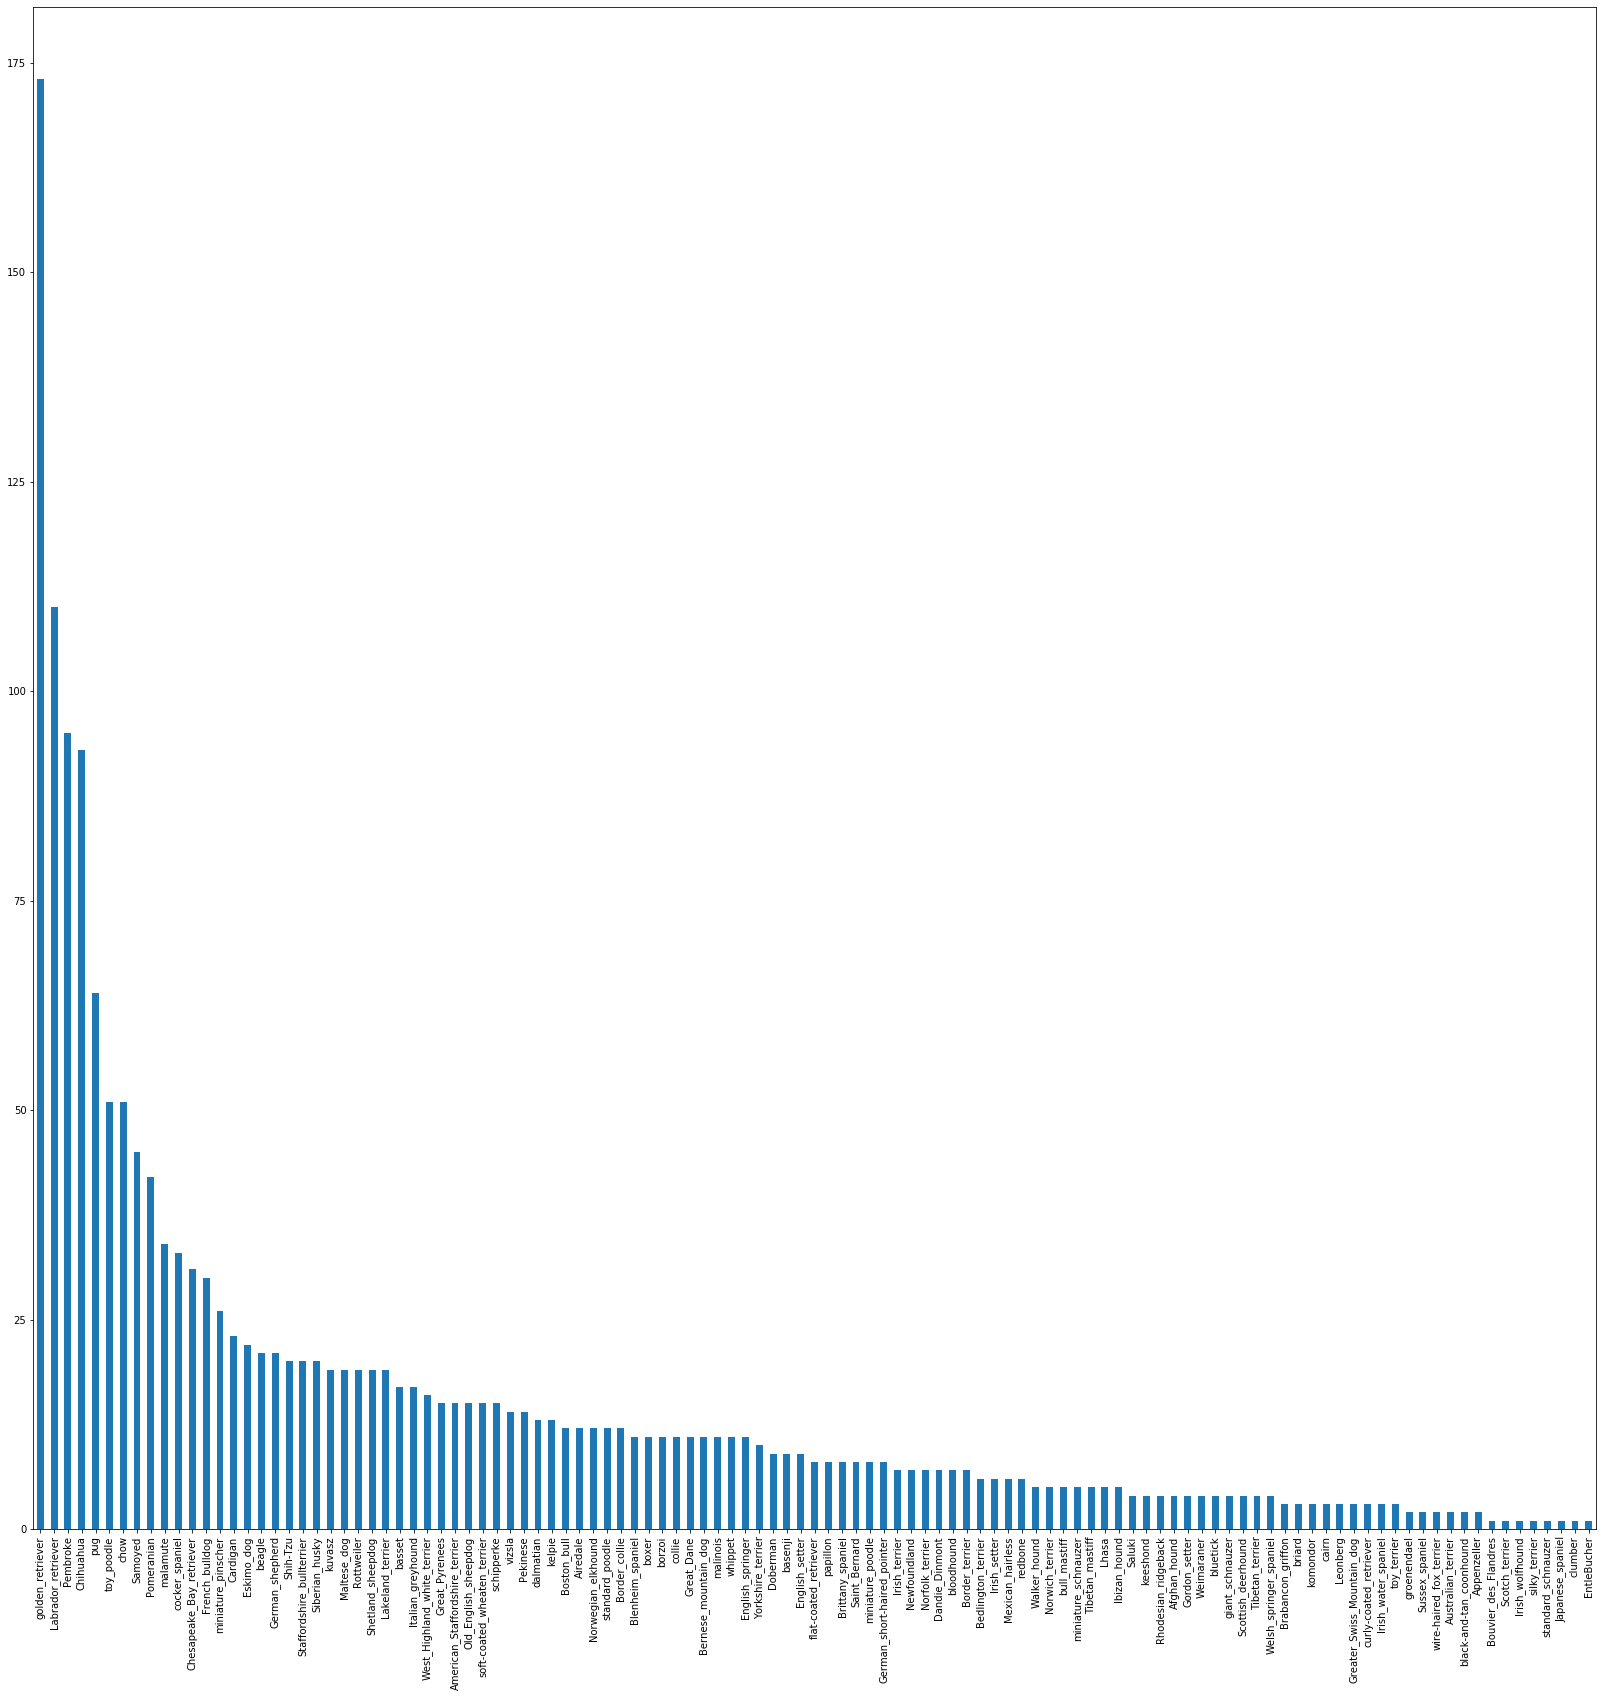

In [200]:
dog_wrangle.breed.value_counts().plot(kind='bar', figsize=(28,28));

from this plot we notice that  golden retriver is the most common breed unlike Bedlington EntleBuncher .

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


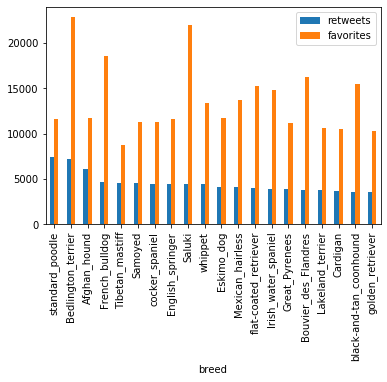

In [144]:
#group by breed and store the means of retweet_count and favorite_count then order by retweet_count and favorite_count.
group = dog_wrangle.groupby(['breed'])['retweets', 'favorites'].mean().sort_values(['retweets', 'favorites'], ascending=False)
#plot the top 20 average counts.
group.iloc[0:20,].plot(kind='bar');

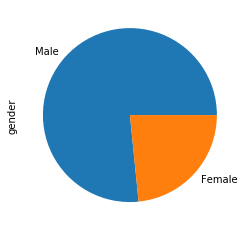

In [149]:
dog_wrangle['gender'].value_counts().plot(kind='pie');

from this chart we find that males are more dominant 

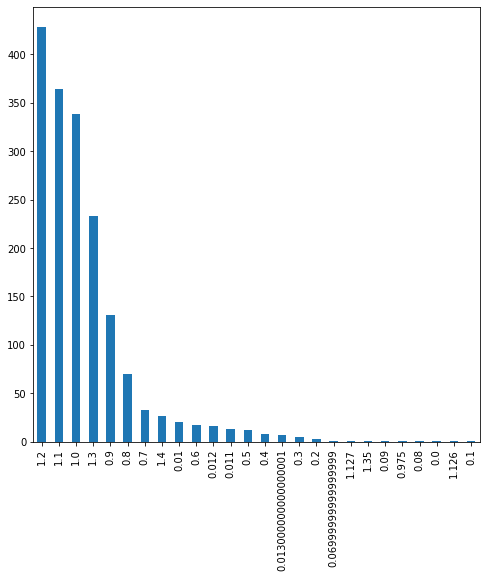

In [197]:
 dog_wrangle.ratings.sort_values(ascending=False).value_counts().plot(kind='bar',figsize=(8,8));

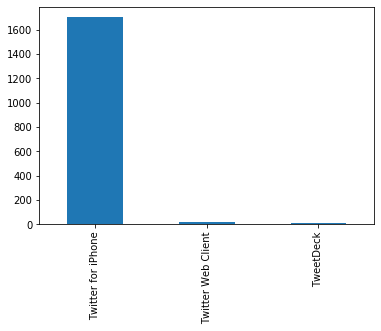

In [199]:
dog_wrangle['source'].value_counts().plot(kind='bar');

Twitter for iphone is the most common source 